<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/kaggle_sales.csv')
df = df[(df['store'] == 1) & (df['item'] == 1)] # item 1 in store 1
df = df.set_index('date')

y = pd.DataFrame(df['sales'])
y.index.freq='D'
y_to_train = y[:-365]
y_to_test = y[-365:] # last year for testing

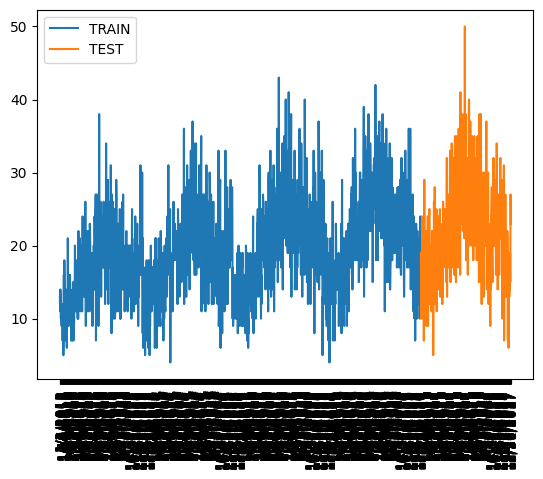

In [2]:
from matplotlib import pyplot as plt
plt.xticks( rotation='vertical')
plt.plot(y_to_train.index,y_to_train, label='TRAIN')
plt.plot(y_to_test.index,y_to_test, label='TEST')
plt.legend(loc="upper left")
plt.show()

In [ ]:
!pip install tbats

     |████████████████████████████████| 43 kB 920 kB/s 
     |████████████████████████████████| 1.4 MB 6.9 MB/s 
     |████████████████████████████████| 9.8 MB 46.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from tbats import TBATS, BATS# Fit the model
estimator = TBATS(seasonal_periods=(7, 365.25))
model = estimator.fit(y_to_train)# Forecast 365 days ahead
y_forecast = model.forecast(steps=365)

In [ ]:
y_forecast = model.forecast(steps=365)

test_predictions=pd.DataFrame(y_forecast)
test_predictions.columns=['sales']


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(y_to_test,y_forecast)}')
print(f'Mean Squared Error = {mean_squared_error(y_to_test,y_forecast)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(y_to_test),np.array(y_forecast) )}')

Mean Absolute Error = 3.8577289832270028
Mean Squared Error = 23.637445028684905
Mean Absolute Percentage Error = 35.497625473230976


Text(0.5, 1.0, 'Train, Test and Predicted Test using TBATS ')

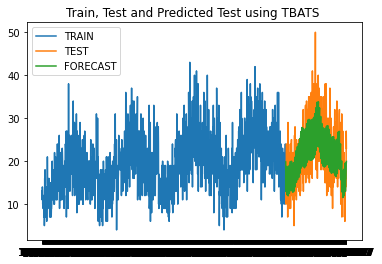

In [ ]:
from matplotlib import pyplot as plt
plt.plot(y_to_train,label='TRAIN')
plt.plot(y_to_test,label='TEST')
ni=y_to_test.index
test_predictions=test_predictions.set_index(ni)
plt.plot(test_predictions,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using TBATS ')

Holt Winters

In [ ]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(y_to_train,trend='mul',seasonal='mul',seasonal_periods=365).fit()
test_predictions = fitted_model.forecast(365).rename('sales')


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
#Evaluate forecasting Performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(y_to_test,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(y_to_test,test_predictions)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(y_to_test),np.array(test_predictions) )}')

Mean Absolute Error = 5.859391287582682
Mean Squared Error = 56.80871732224168
Mean Absolute Percentage Error = 41.26774435015866


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

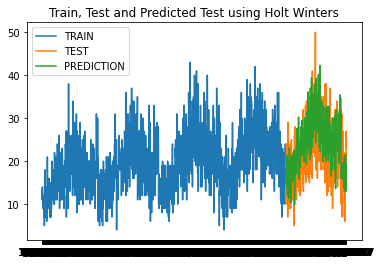

In [ ]:
plt.plot(y_to_train,label='TRAIN')
plt.plot(y_to_test,label='TEST')
test_predictions=pd.DataFrame(test_predictions)
ni=y_to_test.index
test_predictions=test_predictions.set_index(ni)
plt.plot(test_predictions,label='PREDICTION')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using Holt Winters')

MSTL

In [ ]:
!pip install statsforecast

In [28]:
from statsforecast.models import MSTL,AutoARIMA
from statsforecast.utils import AirPassengers as ap


mstl_model = MSTL(season_length=[7, 365])
mstl_model = mstl_model.fit(y=y_to_train['sales'])
y_hat_dict = mstl_model.predict(h=365)
ypred=pd.DataFrame(y_hat_dict)

In [29]:
ypred2=ypred.set_index(y_to_test.index)

In [30]:
#Evaluate forecasting Performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(y_to_test,ypred2)}')
print(f'Mean Squared Error = {mean_squared_error(y_to_test,ypred2)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(y_to_test),np.array(ypred2) )}')

Mean Absolute Error = 5.603044472976897
Mean Squared Error = 48.80406619389173
Mean Absolute Percentage Error = 29.179146467645435


Text(0.5, 1.0, 'Train, Test and Predicted Test using MSTL')

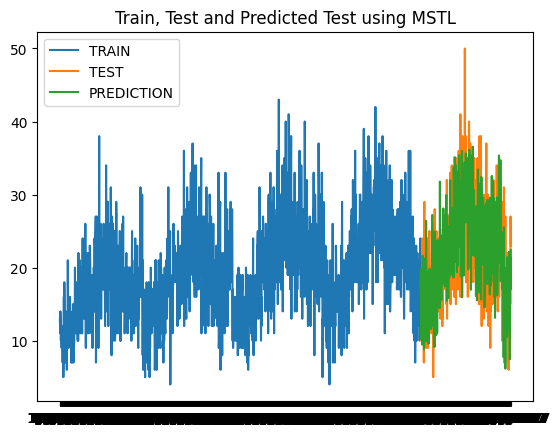

In [32]:
plt.plot(y_to_train,label='TRAIN')
plt.plot(y_to_test,label='TEST')
test_predictions=pd.DataFrame(ypred2)
ni=y_to_test.index
test_predictions=test_predictions.set_index(ni)
plt.plot(test_predictions,label='PREDICTION')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using MSTL')

In [26]:
y_to_train

,sales,unique_id,ds
date,,,
1/1/2013,13,M1,1/1/2013
1/2/2013,11,M1,1/2/2013
1/3/2013,14,M1,1/3/2013
1/4/2013,13,M1,1/4/2013
1/5/2013,10,M1,1/5/2013
...,...,...,...
12/27/2016,10,M1,12/27/2016
12/28/2016,16,M1,12/28/2016
12/29/2016,21,M1,12/29/2016
